# Decision Tree

### Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.



## Data Preparation
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [53]:
import pandas as pd
import numpy as np


# Load the Excel file
file_path = 'heart_disease.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path,sheet_name='Heart_disease')

# Display the first few rows of the DataFrame
df.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## Task 2: Exploratory Data Analysis (EDA)
Perform exploratory data analysis to understand the structure of the dataset.

In [54]:
# Check the structure of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    tres

In [55]:
#Fill missing values for numerical columns with the mean
df.fillna(df.mean(), inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_1028\1440183593.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [56]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [57]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns where you want to remove outliers
numerical_columns = ['age', 'chol', 'trestbps','thalch'] 

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_columns)


# Display the cleaned DataFrame
print(df_cleaned.describe())

# Check the number of rows before and after removing outliers
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

              age    trestbps        chol      thalch     oldpeak         num
count  706.000000  706.000000  706.000000  706.000000  706.000000  706.000000
mean    53.236544  133.038244  243.330028  139.280453    0.914968    0.838527
std      9.098632   17.681339   51.628846   25.647708    1.068674    1.099060
min     30.000000   90.000000   85.000000   67.000000    0.000000    0.000000
25%     47.000000  120.000000  208.250000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  238.500000  140.000000    0.800000    0.000000
75%     59.000000  142.000000  275.000000  160.000000    1.500000    1.000000
max     77.000000  180.000000  409.000000  194.000000    6.200000    4.000000
Original number of rows: 908
Number of rows after removing outliers: 706


##### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

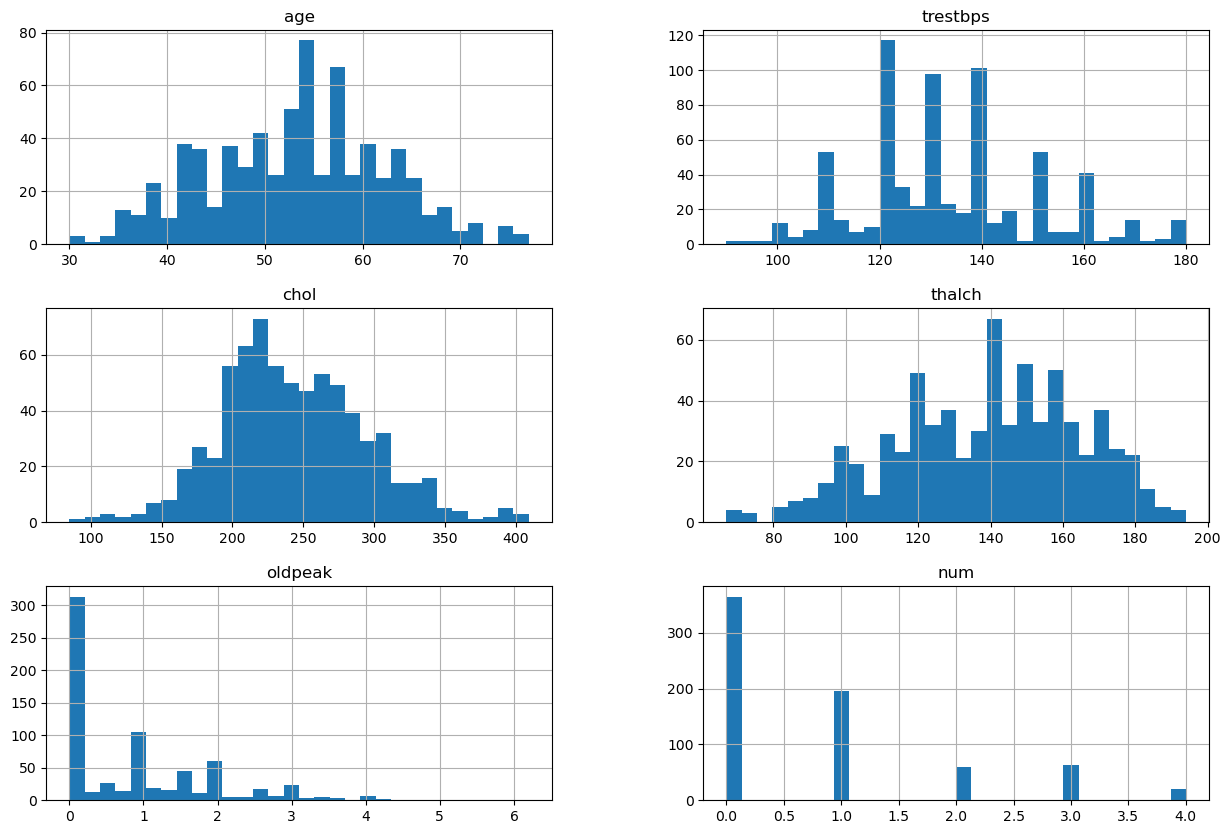

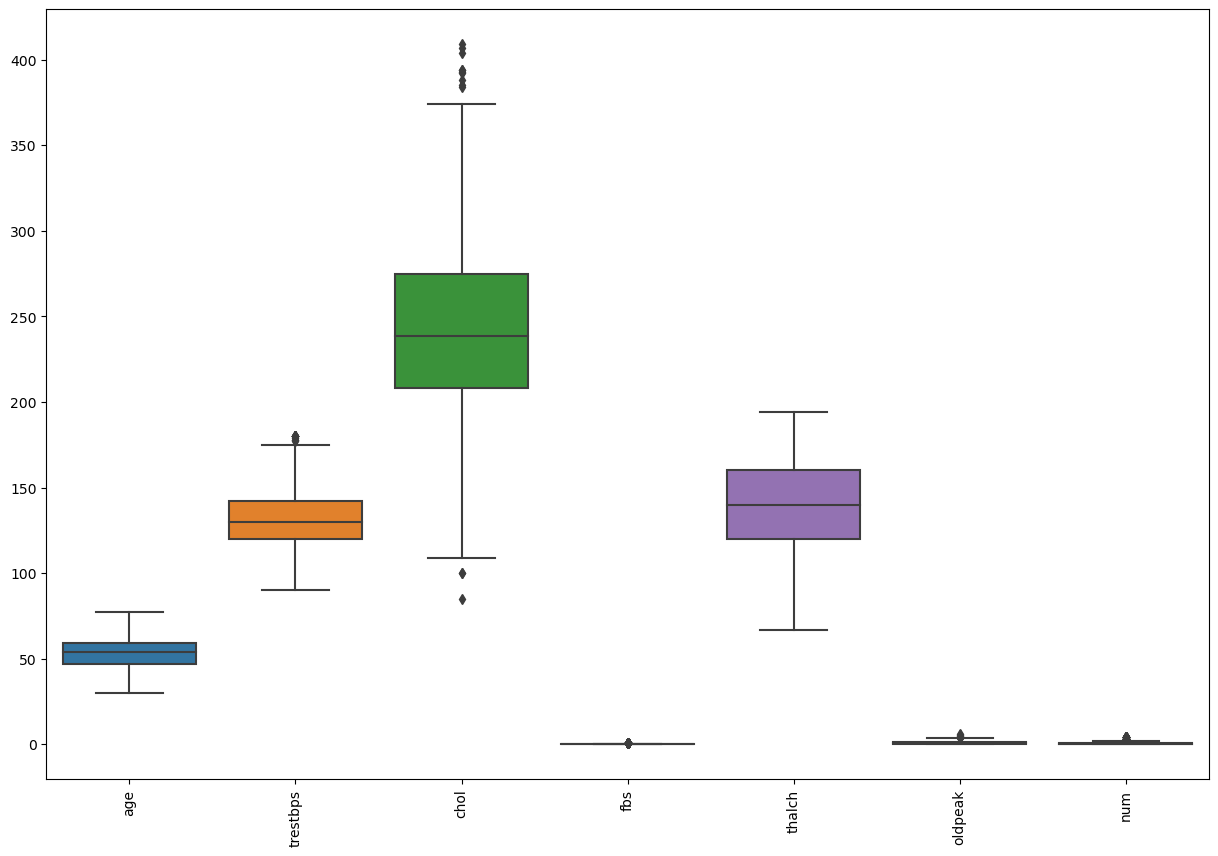

C:\Users\harsh\AppData\Local\Temp\ipykernel_1028\1941866779.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')


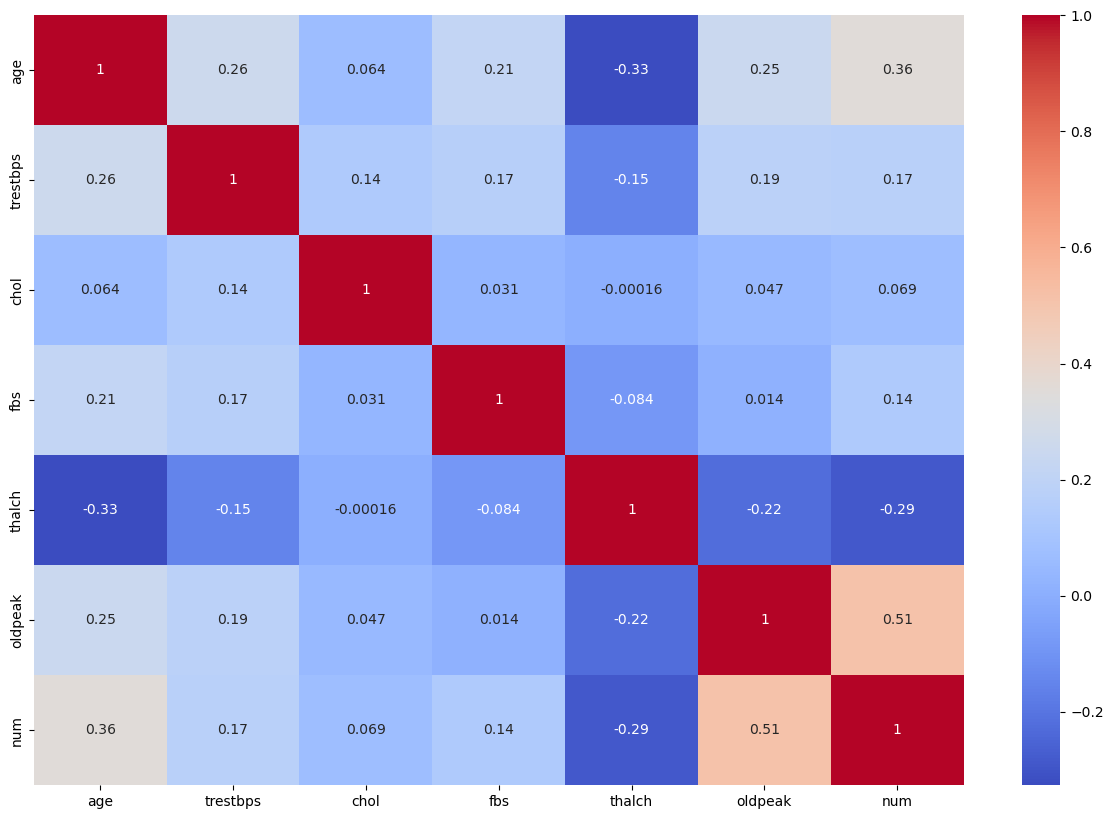

In [58]:

# Visualize the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df_cleaned.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [59]:
df_cleaned.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder


df_cleaned = pd.get_dummies(df_cleaned, columns=['cp', 'thal','restecg','exang','slope','fbs'], drop_first=True)

# Example: Label Encoding binary categorical variable
le = LabelEncoder()
df_cleaned['sex'] = le.fit_transform(df_cleaned['sex'])

df_cleaned.head()


,age,sex,trestbps,chol,thalch,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_normal,thal_reversable defect,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,fbs_True
0,63,1,145,233,150,2.3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,41,1,135,203,132,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,57,1,140,192,148,0.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,52,1,118,186,190,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,57,1,110,201,126,1.5,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [61]:
# Scaling numerical features

numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

In [62]:
# Handling missing values (imputation)
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

## Task 4: Decision Tree Classification
##### Split the dataset into training and testing sets and implement a Decision Tree Classification model.

In [63]:
print(df_cleaned.columns)

Index(['age', 'sex', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'thal_normal', 'thal_reversable defect', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_True', 'exang_FALSE', 'exang_TURE',
       'slope_flat', 'slope_upsloping', 'fbs_True'],
      dtype='object')


In [70]:
threshold = 0.5  # Adjust this threshold based on domain knowledge
df_cleaned['num'] = df_cleaned['num'].apply(lambda x: 1 if x >= threshold else 0)

# Verify the transformation
print(df_cleaned['num'].value_counts())

0    561
1    145
Name: num, dtype: int64


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay

# Define features and target variable
X = df_cleaned.drop('num', axis=1)
y = df_cleaned['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Implement a Decision Tree Classification model 
##### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


Accuracy: 0.795774647887324
Precision: 0.45454545454545453
Recall: 0.37037037037037035
F1 Score: 0.40816326530612246
ROC AUC Score: 0.6330112721417068


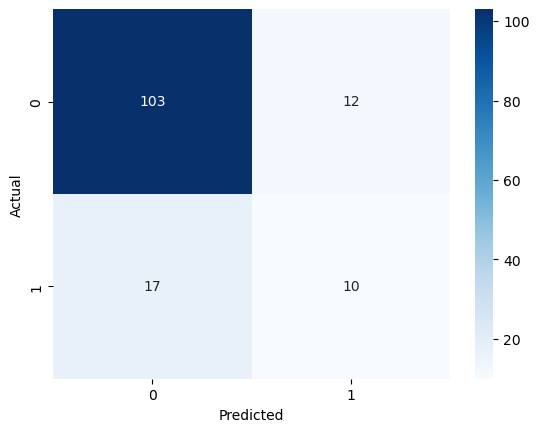

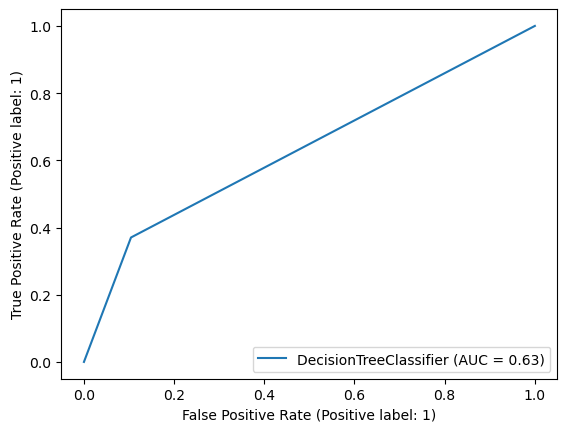

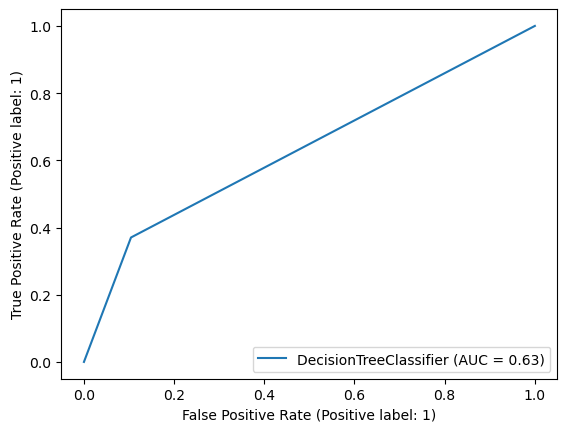

In [76]:
# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the ROC curve
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
roc_display.plot()
plt.show()

## Task 5: Hyperparameter Tuning
Perform hyperparameter tuning to optimize the Decision Tree model.


In [77]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Precision:", precision_score(y_test, y_pred_best))
print("Best Model Recall:", recall_score(y_test, y_pred_best))
print("Best Model F1 Score:", f1_score(y_test, y_pred_best))
print("Best Model ROC AUC Score:", roc_auc_score(y_test, y_pred_best))



Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Best Model Accuracy: 0.8098591549295775
Best Model Precision: 0.5
Best Model Recall: 0.5555555555555556
Best Model F1 Score: 0.5263157894736842
Best Model ROC AUC Score: 0.71256038647343


## Task 6: Model Evaluation and Analysis
Analyze the performance of the Decision Tree model using the evaluation metrics obtained and visualize the decision tree structure.

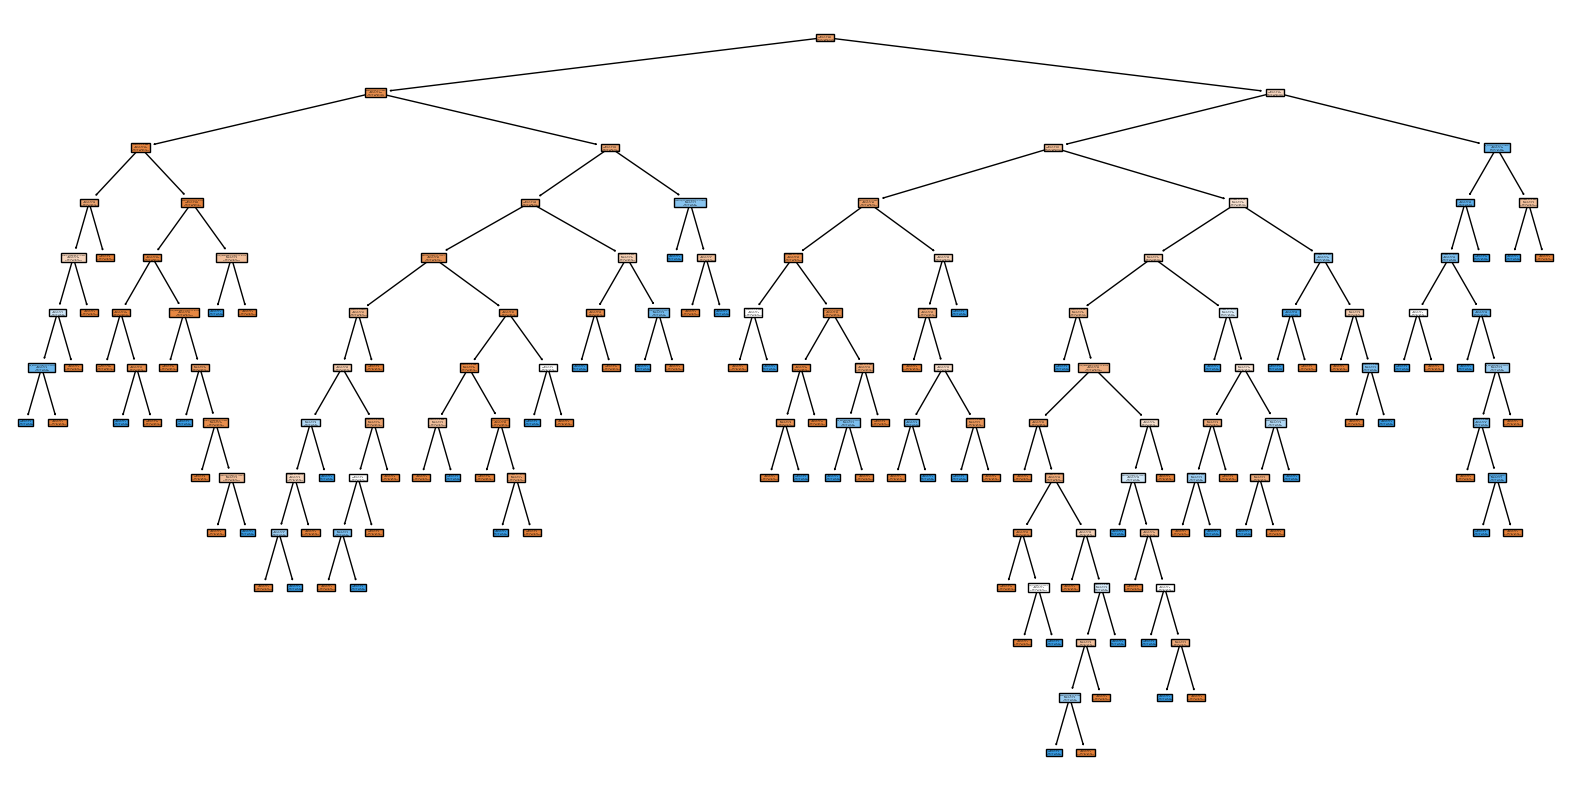

                     Feature  Importance
0                        age    0.224050
5                    oldpeak    0.217315
2                   trestbps    0.113147
4                     thalch    0.109037
3                       chol    0.103384
13                exang_True    0.057601
11            restecg_normal    0.036876
1                        sex    0.024342
9                thal_normal    0.022029
10    thal_reversable defect    0.018584
18                  fbs_True    0.015511
7             cp_non-anginal    0.013396
17           slope_upsloping    0.009947
6         cp_atypical angina    0.008573
12  restecg_st-t abnormality    0.008165
8          cp_typical angina    0.007658
15                exang_TURE    0.007144
14               exang_FALSE    0.003240
16                slope_flat    0.000000


In [80]:
from sklearn import tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['No Disease', 'Disease'])
plt.show()

# Identify important features
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


# Interview Questions:

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Decision tree models are popular for their simplicity and interpretability. Several hyperparameters can be tuned to control the complexity and performance of decision trees. Here are some common hyperparameters and their effects:

1. max_depth:

   Description: Specifies the maximum depth of the tree.
   
   Effect: Limiting the depth of the tree prevents it from becoming too complex and overfitting the training data. A shallow tree (low max_depth) may underfit, missing important patterns, while a deep tree (high max_depth) may overfit, capturing noise in the training data.

2. min_samples_split:

   Description: The minimum number of samples required to split an internal node.

   Effect: Higher values of min_samples_split prevent the model from learning overly specific patterns (overfitting). If set    too high, the model may underfit as it can't grow sufficiently.

3. min_samples_leaf:

   Description: The minimum number of samples required to be at a leaf node.
   
   Effect: Similar to min_samples_split, this parameter controls the size of leaves. A higher value means larger leaves, which can help prevent overfitting but might lead to underfitting if set too high.

4. max_features:

   Description: The number of features to consider when looking for the best split.
   
   Effect: Reducing max_features can introduce randomness and reduce overfitting. This is particularly useful in ensemble methods like Random Forests. Too few features may lead to underfitting.

5. max_leaf_nodes:

   Description: The maximum number of leaf nodes in the tree.
   
   Effect: Constraining the number of leaf nodes can prevent the model from growing too complex and overfitting the training data.

6. min_impurity_decrease:

   Description: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

   Effect: This parameter controls the trade-off between model complexity and the decrease in impurity. Higher values reduce the complexity of the tree, helping to avoid overfitting.

7. criterion:

   Description: The function to measure the quality of a split. Common options are "gini" for Gini impurity and "entropy" for information gain.

   Effect: Different criteria can lead to different tree structures. The choice can affect the tree's performance slightly, but it generally does not have as significant an impact as the other hyperparameters.

Tuning these hyperparameters involves finding the right balance to optimize model performance. Techniques like grid search and randomized search are often used to find the optimal combination of hyperparameters.

## 2. What is the difference between Label encoding and One-hot encoding?
Label Encoding and One-Hot Encoding are techniques used to convert categorical data into a numerical format that can be used by machine learning algorithms.

##### Label Encoding:

1. Description: Assigns a unique integer to each category in a categorical feature. For example, if a feature "Color" has categories ["Red", "Green", "Blue"], it could be encoded as {"Red": 0, "Green": 1, "Blue": 2}.
    
2. Use Case: Useful for ordinal data where the categories have a natural order (e.g., ["Low", "Medium", "High"]).
    
3. Advantages:
   Simple and memory-efficient as it does not create additional columns.
    
4. Disadvantages:
   Implicitly imposes an ordinal relationship among categories, which might not be meaningful for nominal data.
   Can lead to poor performance in algorithms that assume a linear relationship between values (e.g., linear regression).
   
##### One-Hot Encoding:

1. Description: Converts each category of a categorical feature into a new binary feature. For each category, a new binary column is created. For example, the "Color" feature would be encoded as:   

2. Use Case: Appropriate for nominal data where categories do not have a natural order (e.g., colors, countries).

3. Advantages:
   Does not assume any ordinal relationship between categories.
   Each category is treated independently, which is suitable for most machine learning algorithms.

4. Disadvantages:
   Can lead to a significant increase in the dimensionality of the dataset, especially with features having many unique categories.
   Increased computational and memory cost due to additional binary columns.
   
